In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sea 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
%matplotlib inline

In [2]:
trainData=pd.read_csv('wineQualityRed_train.csv', sep=';')
testData=pd.read_csv('wineQualityRed_test.csv', sep=';')
dataTrain=trainData.copy()
dataTest=testData.copy()
print(dataTrain.shape)
print(dataTest.shape)

(1119, 12)
(480, 12)


In [3]:
print(dataTrain.isnull().any())
print()
print(dataTest.isnull().any())

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool


In [4]:
dataTrain['quality']=(trainData['quality']>=7).astype(int)
dataTest['quality']=(testData['quality']>=7).astype(int)
X_train=dataTrain[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
Y_train=dataTrain['quality']
X_test=dataTest[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
Y_test=dataTest['quality']
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(1119, 11)
(1119,)
(480, 11)
(480,)


In [5]:
dataTrain.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
0,8.122176,0.547908,0.242301,2.517416,0.086429,16.478556,45.726987,0.996640,3.321967,0.626977,10.382148
1,8.503681,0.385583,0.362515,2.632515,0.072718,14.680982,34.662577,0.995452,3.295951,0.729080,11.652863


In [6]:
from sklearn import svm
from sklearn.metrics import accuracy_score


#Create a svm Classifier
svc = svm.SVC(kernel='rbf', C=10000.0, gamma=10.0) 

#Train the model using the training sets
svc.fit(X_train, Y_train)

#Predict the response for test dataset
Y_pred = svc.predict(X_test)

print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(svc.score(X_test, Y_test)))
print('Accuracy score: {}'.format(accuracy_score(Y_test, Y_pred)))

Accuracy of logistic regression classifier on test set: 0.89
Accuracy score: 0.8916666666666667


Text(0.5, 1, 'Confusion Matrix')

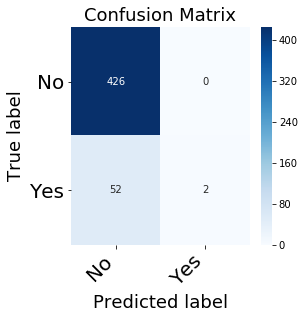

In [19]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(Y_test, Y_pred)

df_cm = pd.DataFrame(confusion_matrix, index=['No', 'Yes'], columns=['No', 'Yes'])
plt.figure(figsize=(4, 4))  
heatmap = sea.heatmap(df_cm, annot=True, cmap='Blues', fmt='g')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=20)
plt.ylabel('True label', fontsize=18)
plt.xlabel('Predicted label', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)

In [20]:
from sklearn.metrics import classification_report
print('Classification Report for SVM:')
print()
print(classification_report(Y_test, Y_pred))

total=sum(sum(confusion_matrix))
accuracy=(confusion_matrix[0,0]+confusion_matrix[1,1])/total
sensitivity = confusion_matrix[1,1]/(confusion_matrix[1,0]+confusion_matrix[1,1])
specificity = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[0,1])
recall=confusion_matrix[1,1]/(confusion_matrix[1,0]+confusion_matrix[1,1])
precision=confusion_matrix[1,1]/(confusion_matrix[0, 1]+confusion_matrix[1,1])
fScore=2*(precision*recall)/(precision+recall)

print('Evaluation Metrics for SVM: ')
print()
print ('Accuracy : ', accuracy)
print('Sensitivity : ', sensitivity )
print('Specificity : ', specificity)
print('Recall Score : ', metrics.recall_score(Y_test, Y_pred))
print('Precision: ', precision)
print('F_score: ', fScore)

Classification Report for SVM:

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       426
           1       1.00      0.04      0.07        54

    accuracy                           0.89       480
   macro avg       0.95      0.52      0.51       480
weighted avg       0.90      0.89      0.84       480

Evaluation Metrics for SVM: 

Accuracy :  0.8916666666666667
Sensitivity :  0.037037037037037035
Specificity :  1.0
Recall Score :  0.037037037037037035
Precision:  1.0
F_score:  0.07142857142857142


In [21]:
import statsmodels.api as sm
logit_model=sm.Logit(Y_train, X_train)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.273333
         Iterations 8
                            Results: Logit
Model:                 Logit             Pseudo R-squared:  0.342     
Dependent Variable:    quality           AIC:               633.7201  
Date:                  2020-10-10 09:09  BIC:               688.9422  
No. Observations:      1119              Log-Likelihood:    -305.86   
Df Model:              10                LL-Null:           -464.52   
Df Residuals:          1108              LLR p-value:       3.3839e-62
Converged:             1.0000            Scale:             1.0000    
No. Iterations:        8.0000                                         
----------------------------------------------------------------------
                      Coef.   Std.Err.    z    P>|z|   [0.025   0.975]
----------------------------------------------------------------------
fixed acidity         -0.0247   0.0977 -0.2525 0.8006  -0.2161  0.1668
vol

In [22]:
X_train_Pval=dataTrain[['volatile acidity', 'chlorides', 'total sulfur dioxide', 'sulphates', 'alcohol']]
Y_train_Pval=dataTrain['quality']
X_test_Pval=dataTest[['volatile acidity', 'chlorides', 'total sulfur dioxide', 'sulphates', 'alcohol']]
Y_test_Pval=dataTest['quality']

In [23]:
svc = svm.SVC(kernel='rbf', C=10000.0, gamma=10.0) 
svc.fit(X_train_Pval, Y_train_Pval)

Y_pred_Pval = svc.predict(X_test_Pval)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(svc.score(X_test_Pval, Y_test_Pval)))
print('Accuracy score: {}'.format(accuracy_score(Y_test_Pval, Y_pred_Pval)))

Accuracy of logistic regression classifier on test set: 0.86
Accuracy score: 0.8645833333333334


Text(0.5, 1, 'Confusion Matrix')

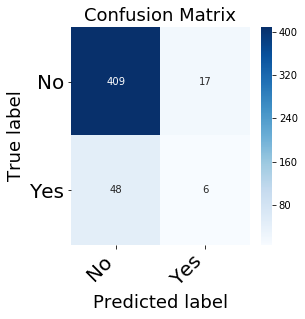

In [24]:
from sklearn.metrics import confusion_matrix

confusion_matrix_Pval = confusion_matrix(Y_test, Y_pred_Pval)

df_cm_Pval = pd.DataFrame(confusion_matrix_Pval, index=['No', 'Yes'], columns=['No', 'Yes'])
plt.figure(figsize=(4, 4))  
heatmap = sea.heatmap(df_cm_Pval, annot=True, cmap='Blues', fmt='g')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=20)
plt.ylabel('True label', fontsize=18)
plt.xlabel('Predicted label', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)

In [25]:
from sklearn.metrics import classification_report
print('Classification Report for SVM with p-value features:')
print()
print(classification_report(Y_test, Y_pred_Pval))

total=sum(sum(confusion_matrix_Pval))
accuracy=(confusion_matrix_Pval[0,0]+confusion_matrix_Pval[1,1])/total
sensitivity = confusion_matrix_Pval[1,1]/(confusion_matrix_Pval[1,0]+confusion_matrix_Pval[1,1])
specificity = confusion_matrix_Pval[0,0]/(confusion_matrix_Pval[0,0]+confusion_matrix_Pval[0,1])
recall=confusion_matrix_Pval[1,1]/(confusion_matrix_Pval[1,0]+confusion_matrix_Pval[1,1])
precision=confusion_matrix_Pval[1,1]/(confusion_matrix_Pval[0, 1]+confusion_matrix_Pval[1,1])
fScore=2*(precision*recall)/(precision+recall)

print('Evaluation Metrics for SVM with p-value features: ')
print()
print ('Accuracy : ', accuracy)
print('Sensitivity : ', sensitivity )
print('Specificity : ', specificity)
print('Recall Score : ', recall)
print('Precision: ', precision)
print('F_score: ', fScore)

Classification Report for SVM with p-value features:

              precision    recall  f1-score   support

           0       0.89      0.96      0.93       426
           1       0.26      0.11      0.16        54

    accuracy                           0.86       480
   macro avg       0.58      0.54      0.54       480
weighted avg       0.82      0.86      0.84       480

Evaluation Metrics for SVM with p-value features: 

Accuracy :  0.8645833333333334
Sensitivity :  0.1111111111111111
Specificity :  0.960093896713615
Recall Score :  0.1111111111111111
Precision:  0.2608695652173913
F_score:  0.15584415584415584


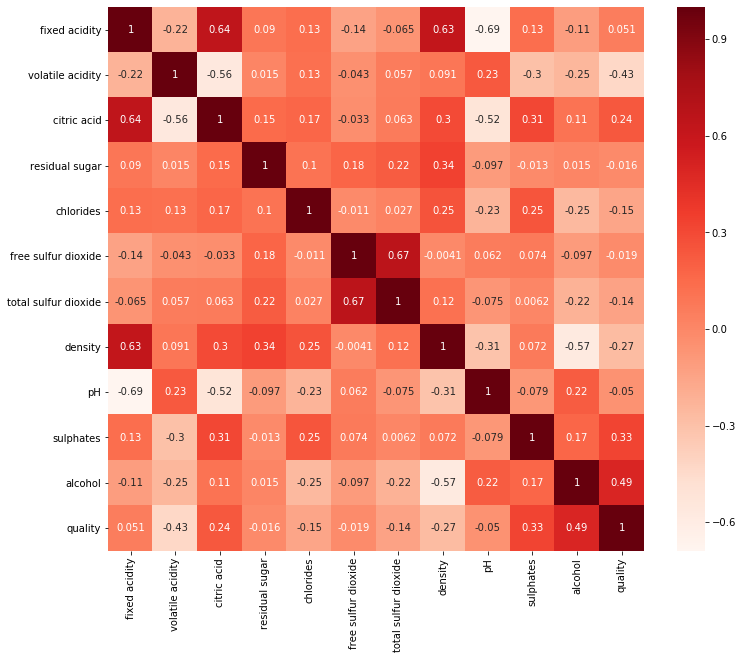

In [26]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
corr = trainData.corr()
sea.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.show()

In [27]:
#Correlation with output variable
corr_target = abs(corr['quality'])
#Selecting highly correlated features
relevant_features = corr_target[corr_target>0.3]
relevant_features

volatile acidity    0.426341
sulphates           0.325453
alcohol             0.492111
quality             1.000000
Name: quality, dtype: float64

In [28]:
X_train_3var=dataTrain[['volatile acidity', 'sulphates', 'alcohol']]
Y_train_3var=dataTrain['quality']
X_test_3var=dataTest[['volatile acidity', 'sulphates', 'alcohol']]
Y_test_3var=dataTest['quality']

In [29]:
svc = svm.SVC(kernel='rbf', C=10000.0, gamma=10.0) 
svc.fit(X_train_3var, Y_train_3var)

Y_pred_3var = svc.predict(X_test_3var)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(svc.score(X_test_3var, Y_test_3var)))
print('Accuracy score: {}'.format(accuracy_score(Y_test_3var, Y_pred_3var)))

Accuracy of logistic regression classifier on test set: 0.85
Accuracy score: 0.8541666666666666


Text(0.5, 1, 'Confusion Matrix')

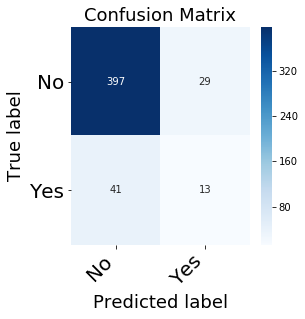

In [30]:
from sklearn.metrics import confusion_matrix

confusion_matrix_3var = confusion_matrix(Y_test, Y_pred_3var)

df_cm_3var = pd.DataFrame(confusion_matrix_3var, index=['No', 'Yes'], columns=['No', 'Yes'])
plt.figure(figsize=(4, 4))  
heatmap = sea.heatmap(df_cm_3var, annot=True, cmap='Blues', fmt='g')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=20)
plt.ylabel('True label', fontsize=18)
plt.xlabel('Predicted label', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)

In [31]:
print('Classification Report for SVM with 3 features (based on Pearson coefficient):')
print()
print(classification_report(Y_test, Y_pred_3var))

total=sum(sum(confusion_matrix_3var))
accuracy=(confusion_matrix_3var[0,0]+confusion_matrix_3var[1,1])/total
sensitivity = confusion_matrix_3var[1,1]/(confusion_matrix_3var[1,0]+confusion_matrix_3var[1,1])
specificity = confusion_matrix_3var[0,0]/(confusion_matrix_3var[0,0]+confusion_matrix_3var[0,1])
recall=confusion_matrix_3var[1,1]/(confusion_matrix_3var[1,0]+confusion_matrix_3var[1,1])
precision=confusion_matrix_3var[1,1]/(confusion_matrix_3var[0, 1]+confusion_matrix_3var[1,1])
fScore=2*(precision*recall)/(precision+recall)

print('Evaluation Metrics for SVM with 3 features (based on Pearson coefficient): ')
print()
print ('Accuracy : ', accuracy)
print('Sensitivity : ', sensitivity )
print('Specificity : ', specificity)
print('Recall Score : ', recall)
print('Precision: ', precision)
print('F_score: ', fScore)

Classification Report for SVM with 3 features (based on Pearson coefficient):

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       426
           1       0.31      0.24      0.27        54

    accuracy                           0.85       480
   macro avg       0.61      0.59      0.59       480
weighted avg       0.84      0.85      0.85       480

Evaluation Metrics for SVM with 3 features (based on Pearson coefficient): 

Accuracy :  0.8541666666666666
Sensitivity :  0.24074074074074073
Specificity :  0.931924882629108
Recall Score :  0.24074074074074073
Precision:  0.30952380952380953
F_score:  0.2708333333333333
